In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from sklearn.model_selection import train_test_split

### 五、练习
1、使用多种方法对boston数据集进行回归，画出回归图像，并比较多种回归方法的效果

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [5]:
df = DataFrame(data=data, columns=feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [7]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [8]:
knn.score(X_test, y_test)

0.4267301207022345

In [9]:
knn.score(X_train, y_train)

0.7030729857140253

In [10]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [11]:
linear.score(X_test, y_test)

0.6741871407288293

In [12]:
linear.score(X_train, y_train)

0.7567799762133971

In [13]:
poly2 = PolynomialFeatures()
X_train_poly2 = poly2.fit_transform(X_train)
linear_poly2 = LinearRegression()
linear_poly2.fit(X_train_poly2, y_train)

LinearRegression()

In [14]:
X_test_poly2 = poly2.transform(X_test)
linear_poly2.score(X_test_poly2, y_test)

0.8327445718083628

In [15]:
linear_poly2.score(X_train_poly2, y_train)

0.9263032126690861

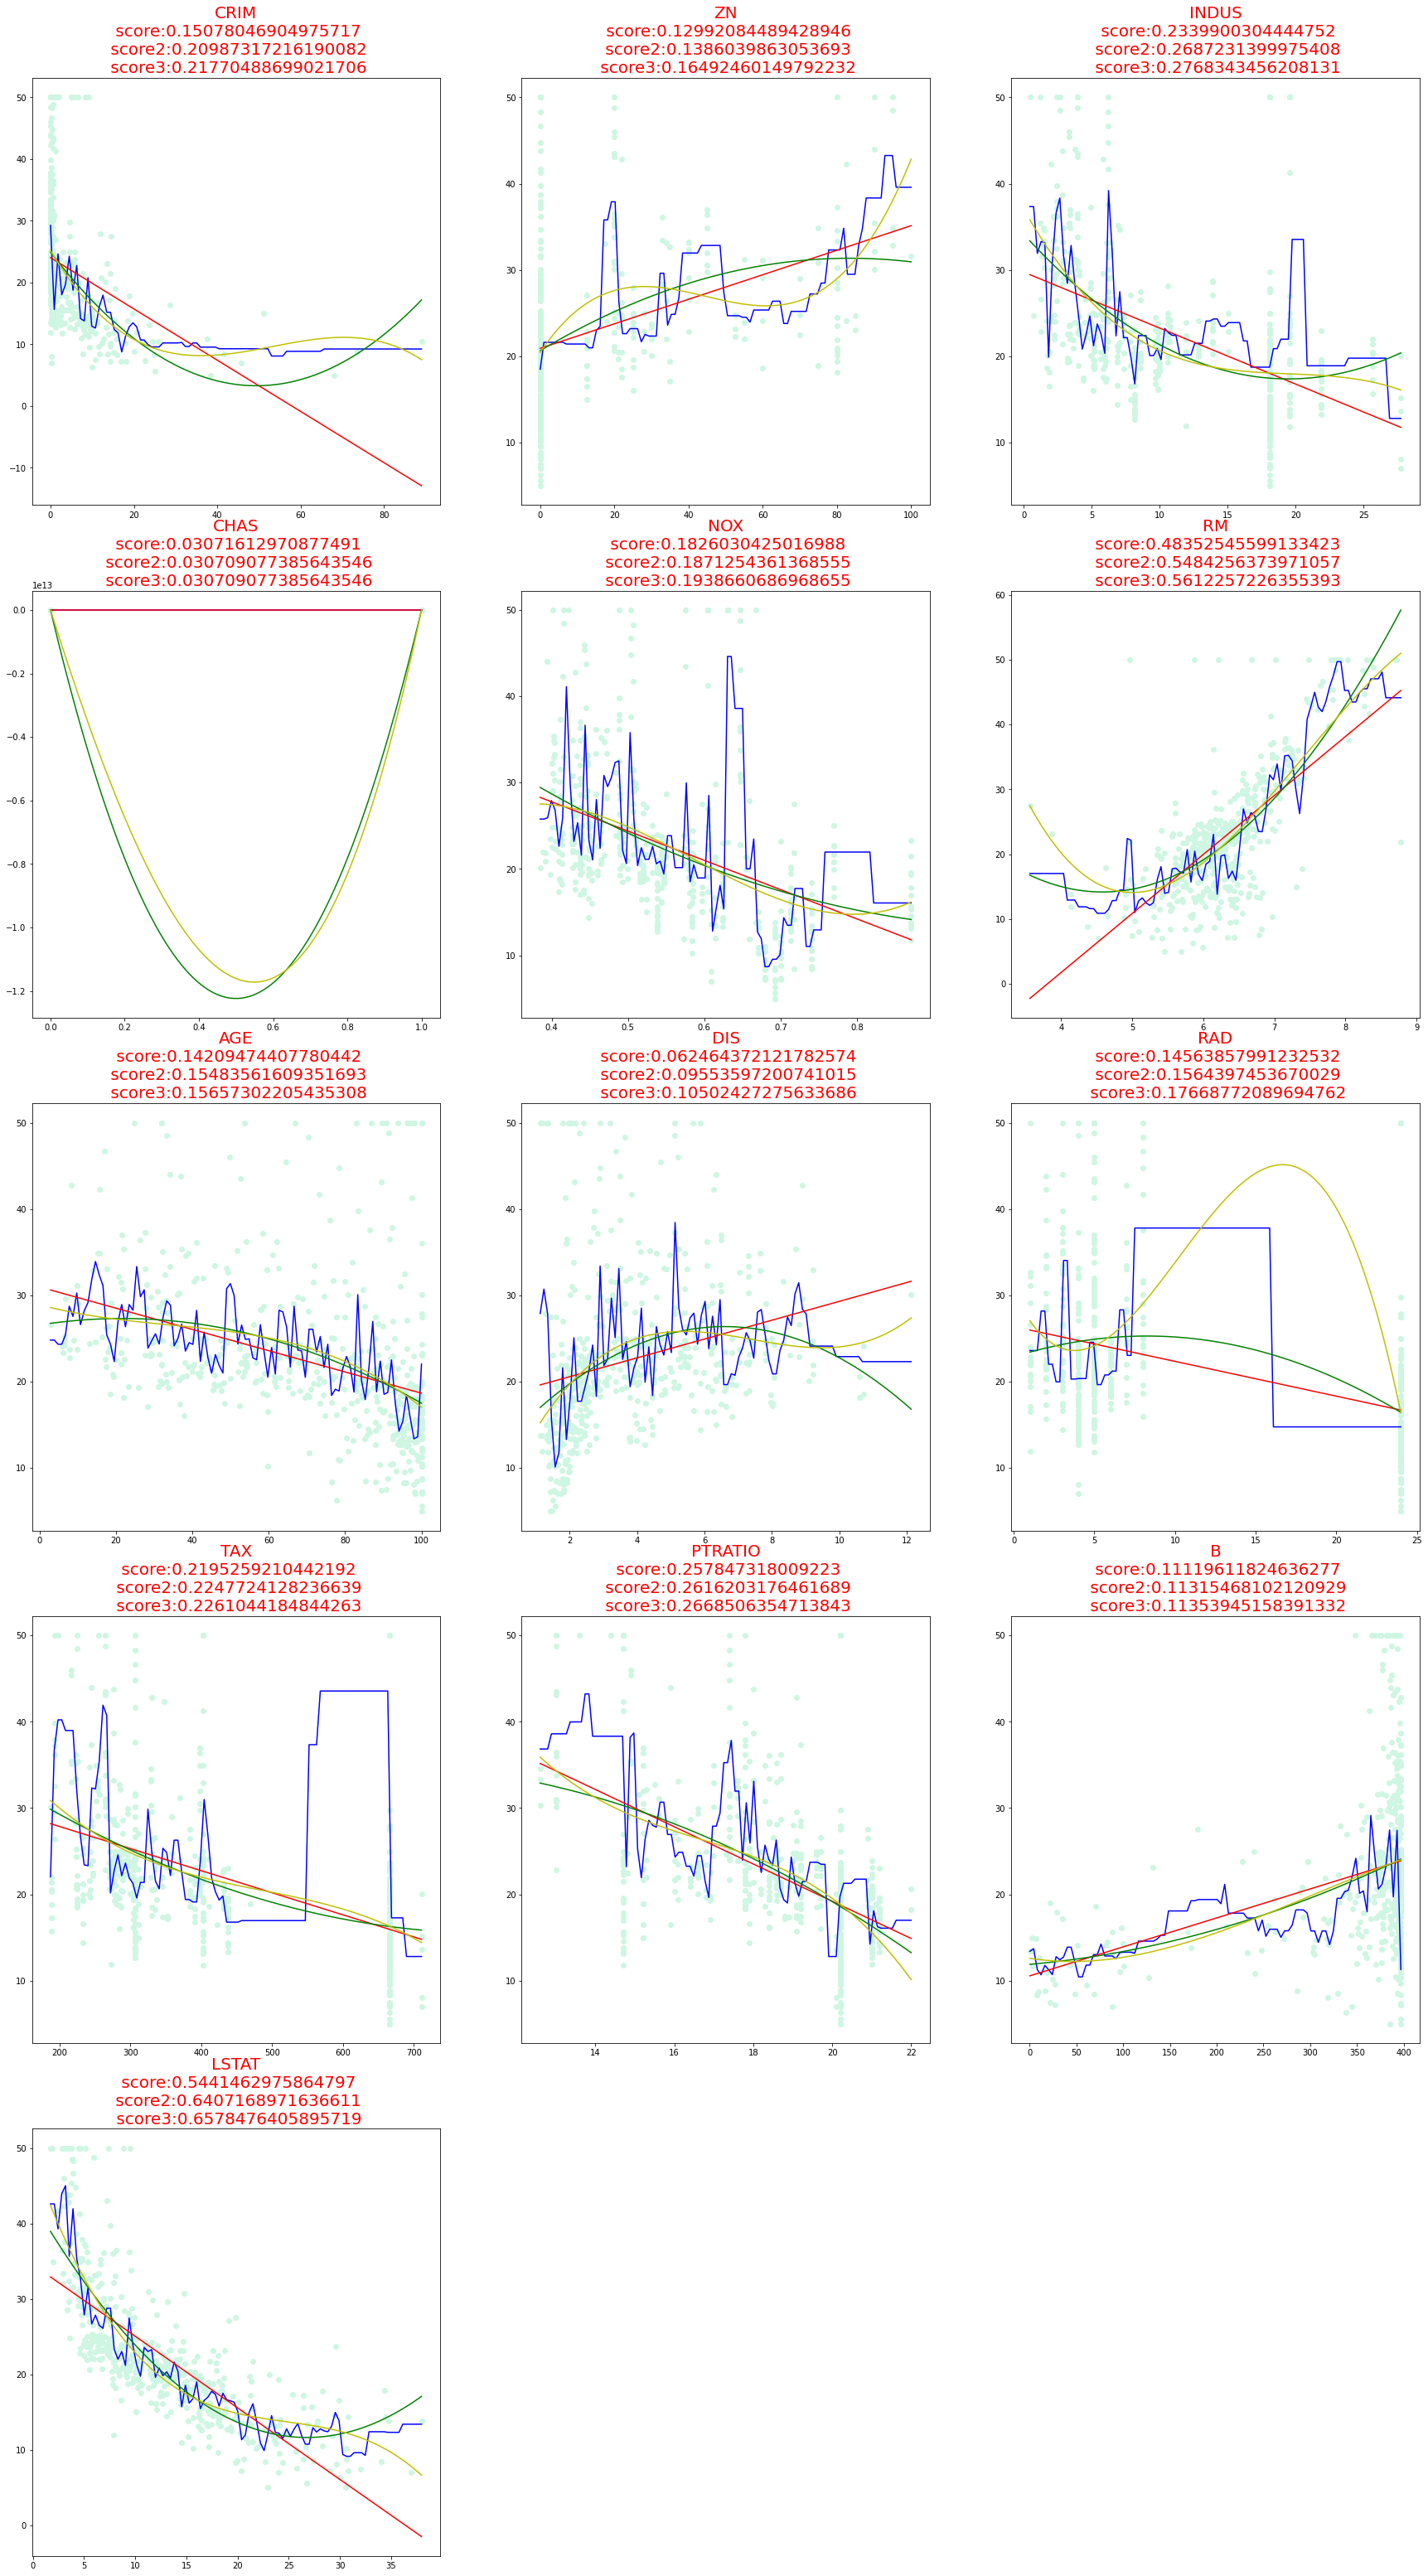

In [20]:
plt.figure(figsize=(3*10,11*5))
for i, col in enumerate(feature_names,1):
    X_train = df[[col]]
    X_test = np.linspace(X_train.min(), X_train.max(),100).reshape(-1,1)
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, target)
    yk_ = knn.predict(X_test)
    
    linear = LinearRegression()
    linear.fit(X_train, target)
    y_ = linear.predict(X_test)
    
    poly2 = PolynomialFeatures()
    X_train_poly2 = poly2.fit_transform(X_train)
    linear_poly2 = LinearRegression()    
    linear_poly2.fit(X_train_poly2, target)
    X_test_poly2 = poly2.fit_transform(X_test)
    y2 = linear_poly2.predict(X_test_poly2)
    
    poly3 = PolynomialFeatures(degree=3)
    X_train_poly3 = poly3.fit_transform(X_train)
    linear_poly3 = LinearRegression()
    linear_poly3.fit(X_train_poly3, target)
    X_test_poly3 = poly3.fit_transform(X_test)
    y3 = linear_poly3.predict(X_test_poly3)
    
    
    axes = plt.subplot(5,3,i)
    axes.scatter(X_train, target, c='#CEF6E3')
    axes.plot(X_test,yk_,c='b')
    axes.plot(X_test,y_,c='r')
    axes.plot(X_test,y2,c='g')
    axes.plot(X_test,y3,c='y')
    score = linear.score(X_train, target)
    score2 = linear_poly2.score(X_train_poly2, target)
    score3 = linear_poly3.score(X_train_poly3, target)
    axes.set_title(f'{col}\n score:{score}\n score2:{score2}\n score3:{score3}',fontdict=dict(size=20,color='r'))

2、预测鲍鱼的年龄
abalone.txt

In [21]:
abalone = pd.read_csv('./data/abalone.txt', sep='\t', header=None)
abalone

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [22]:
abalone.columns = ['Sex',
                    'Length',
                    'Diameter',
                    'Height',
                    'Whole weight',
                    'Shucked weight',
                    'Viscera weight',
                    'Shell weight',
                    'Rings']

In [23]:
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [24]:
abalone.describe()  # 发现异常值!!!!!!  height 有个 比平均高度高了1米

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,-1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,-1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [25]:
# 搞定异常值
abalone.loc[(abalone['Height']>3 * abalone['Height'].mean()), 'Height'] = abalone['Height'].mean()

In [26]:
abalone.describe()  # 检查是否填充搞定异常值

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.052909,0.523992,0.407881,0.139189,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.038480,0.490389,0.221963,0.109614,0.139203,3.224169
min,-1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,-1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,1.000000,0.815000,0.650000,0.250000,2.825500,1.488000,0.760000,1.005000,29.000000


In [27]:
data = abalone.iloc[:, 1:-1].values.copy()
target = abalone.iloc[:,-1].values.copy()
target

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

In [28]:
abalone[['Height']].max()

Height    0.25
dtype: float64

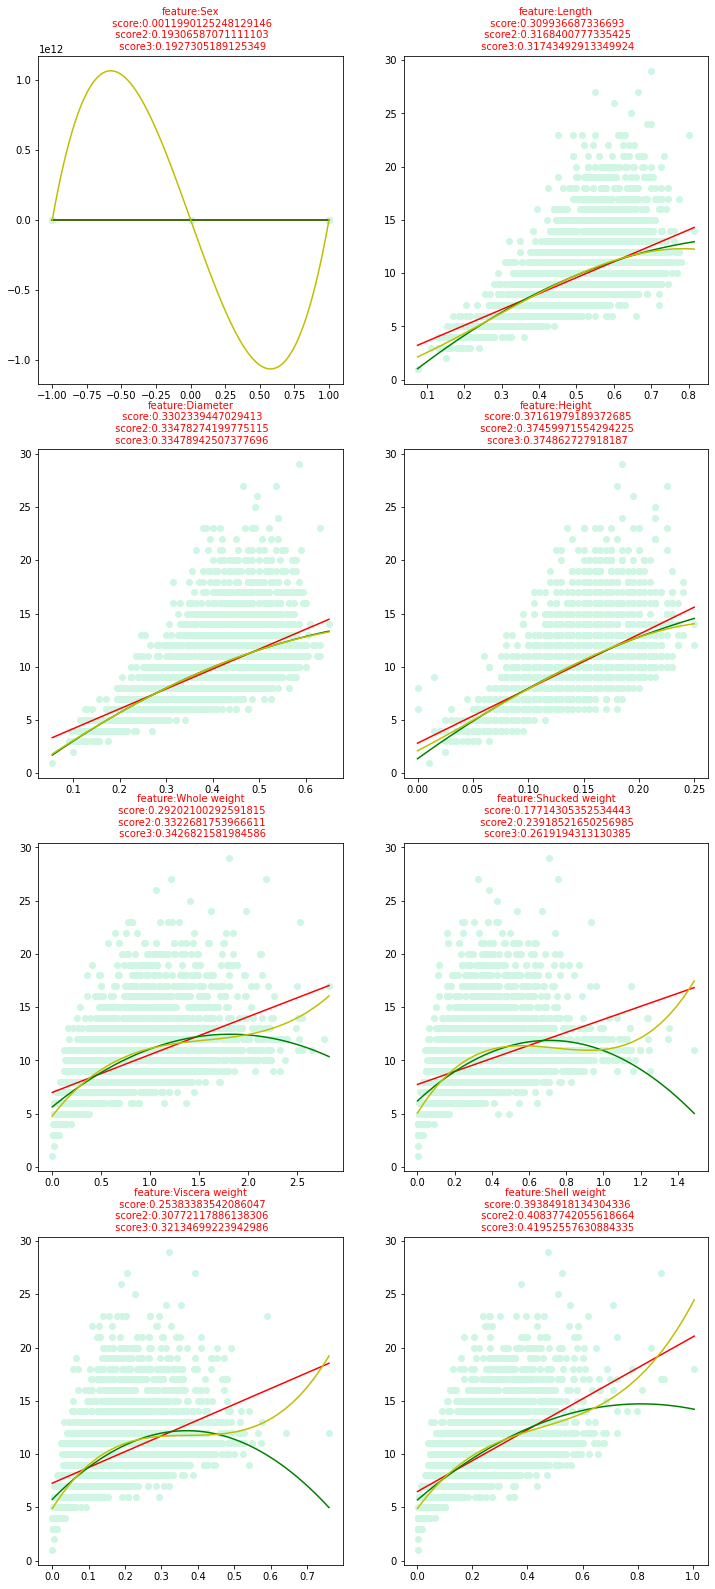

In [29]:
plt.figure(figsize=(2 * 6, 7 * 5))
for i, col in enumerate(abalone.columns[0:-1], 1):
    X_train = abalone[[col]]
    X_test = np.linspace(X_train.min(), X_train.max(),100).reshape(-1,1)
    
    linear = LinearRegression()
    linear.fit(X_train, target)
    y_ = linear.predict(X_test)
    
#     axes.set_title(col +':' +str(score))
    
    
    poly2 = PolynomialFeatures()
    X_train_poly2 = poly2.fit_transform(X_train)    
    X_test_poly2 = poly2.fit_transform(X_test)
    linear_poly2 = LinearRegression()
    linear_poly2.fit(X_train_poly2, target)
    y2_ = linear_poly2.predict(X_test_poly2)
    
    
    poly3 = PolynomialFeatures(degree=3)
    X_train_poly3 = poly3.fit_transform(X_train)    
    X_test_poly3 = poly3.fit_transform(X_test)
    linear_poly3 = LinearRegression()
    linear_poly3.fit(X_train_poly3, target)
    y3_ = linear_poly3.predict(X_test_poly3)
    
    axes = plt.subplot(5,2,i)
    axes.scatter(X_train, target, c='#CEF6E3')
    axes.plot(X_test, y_, c='r')
    axes.plot(X_test, y2_, c='g')
    axes.plot(X_test, y3_,c='y')
    
    score = linear.score(X_train, target)
    score2 = linear_poly2.score(X_train_poly2, target)
    score3 = linear_poly3.score(X_train_poly3, target)
    
    axes.set_title(f'feature:{col}\n score:{score}\n score2:{score2}\n score3:{score3}',fontdict=dict(size=10,color='r'))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [65]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

In [66]:
linear = LinearRegression()
linear.fit(X_train_poly, y_train)

LinearRegression()

In [67]:
X_test_poly = poly.fit_transform(X_test)
linear.predict(X_test_poly)+1.5

array([12.03468578,  8.78426822, 12.96918116, 11.80932909,  9.988304  ,
       11.31532081, 12.45522491, 11.20530868, 10.30743832,  9.69229756,
        9.49115646, 13.17888552, 10.07194482, 10.05495497, 10.01249255,
       11.86211296, 10.02774623,  9.90485368, 10.5763462 , 12.9847944 ,
        9.34016027, 11.22531675,  7.93174982,  8.56310453, 11.69156674,
       14.11654688, 10.79862845, 13.14955266,  5.64200834, 10.33111331,
       13.47768749, 10.68323232,  9.89515   ,  8.81855339, 13.32743279,
       10.04225846, 12.40712499, 13.22891645,  9.66834621,  9.1456572 ,
        5.08122058,  9.77608109, 10.53716374,  9.70865764, 12.27219726,
       10.18009541, 10.97826537, 14.52213662, 10.82784099, 11.42953799,
        7.98415834, 12.70452675, 15.79916378, 11.38019424, 14.06475385,
       10.00023067, 11.6585704 ,  9.87849142, 12.53383564, 13.31922265,
       10.17777408, 11.42406165, 13.29578129,  8.49522814,  7.91431981,
        9.94927635, 19.48292765,  8.27929537,  8.54761397, 13.07

In [68]:
linear.score(X_test_poly, y_test)

0.5468716531092721

In [69]:
linear.score(X_train_poly, y_train)

0.5861258385158892